In [1]:
! pip install torchsummary
! pip install onnxruntime
! pip install audiomentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 2.6 MB/s eta 0:00:00


In [2]:
import torch
from torch import nn
import torchaudio
from torchsummary import summary
from torch.utils.data import DataLoader
import datetime
import matplotlib.pyplot as plt

In [3]:
from escyamnetdataset.escyamnetdataset import ESCYamnetDataset

In [4]:
from esc_utils3.esc_utils3 import train,test,plot_costs,plot_accuracies

In [5]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")

Using device cuda


In [6]:
AUDIO_PATH = "/kaggle/input/esc-50/dataset/audio"
CSV_PATH  = "/kaggle/input/esc-50/dataset/meta/esc50.csv"
YAMNET_ONNX_PATH = "/kaggle/input/yamnet_omnx/onnx/default/1/yamnet.onnx"
STORE_PATH = '/kaggle/working'

In [7]:
train_dataset = ESCYamnetDataset(CSV_PATH,AUDIO_PATH,True,YAMNET_ONNX_PATH,"max")
test_dataset = ESCYamnetDataset(CSV_PATH,AUDIO_PATH,False,YAMNET_ONNX_PATH,"max")

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [8]:
INPUT_SIZE = train_dataset[0][0].shape[0]
print(f"Input size : {INPUT_SIZE}")

Input size : 1024


In [9]:
class NN(nn.Module):
    def __init__(self,input_size,num_classes,dropout_prob = 0.):
        super().__init__()
        self.fc = nn.Linear(input_size,num_classes)
        self.dropout = nn.Dropout(dropout_prob)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self,input_data):
        x = self.dropout(input_data)
        logits = self.fc(x)
        predictions = self.softmax(logits)
        return predictions

In [10]:
model = NN(INPUT_SIZE,50)
summary(model.to(device),(1,INPUT_SIZE))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Dropout-1              [-1, 1, 1024]               0
            Linear-2                [-1, 1, 50]          51,250
           Softmax-3                [-1, 1, 50]               0
Total params: 51,250
Trainable params: 51,250
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.20
Estimated Total Size (MB): 0.21
----------------------------------------------------------------


In [11]:
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(),lr=1e-2,weight_decay=1e-4)
EPOCHS = 10

In [12]:
model_history = train(model,train_loader,loss_fn,optimiser,device,EPOCHS,test_loader)

Epoch 1
|||||		Cost : 3.7482057571411134	train accuracy : 32.25%	test accuracy : 37.95%
--------------------------
Epoch 2
|||||		Cost : 3.6091513061523437	train accuracy : 40.69%	test accuracy : 45.98%
--------------------------
Epoch 3
|||||		Cost : 3.5540071964263915	train accuracy : 43.88%	test accuracy : 51.12%
--------------------------
Epoch 4
|||||		Cost : 3.5228561973571777	train accuracy : 48.00%	test accuracy : 51.79%
--------------------------
Epoch 5
|||||		Cost : 3.500520763397217	train accuracy : 45.12%	test accuracy : 53.79%
--------------------------
Epoch 6
|||||		Cost : 3.491865749359131	train accuracy : 49.81%	test accuracy : 54.46%
--------------------------
Epoch 7
|||||		Cost : 3.4617973136901856	train accuracy : 50.56%	test accuracy : 53.57%
--------------------------
Epoch 8
|||||		Cost : 3.4629135513305664	train accuracy : 50.94%	test accuracy : 54.91%
--------------------------
Epoch 9
|||||		Cost : 3.4558403396606447	train accuracy : 51.12%	test accuracy : 5

In [13]:
current_time = str(datetime.datetime.now())[:-7].replace(' ','_').replace(':','-')
MODEL_PATH = f"{STORE_PATH}/esc-model1_{current_time}.pth"
print(MODEL_PATH)
torch.save(model.state_dict(),MODEL_PATH)

/kaggle/working/esc-model1_2024-08-20_05-30-11.pth


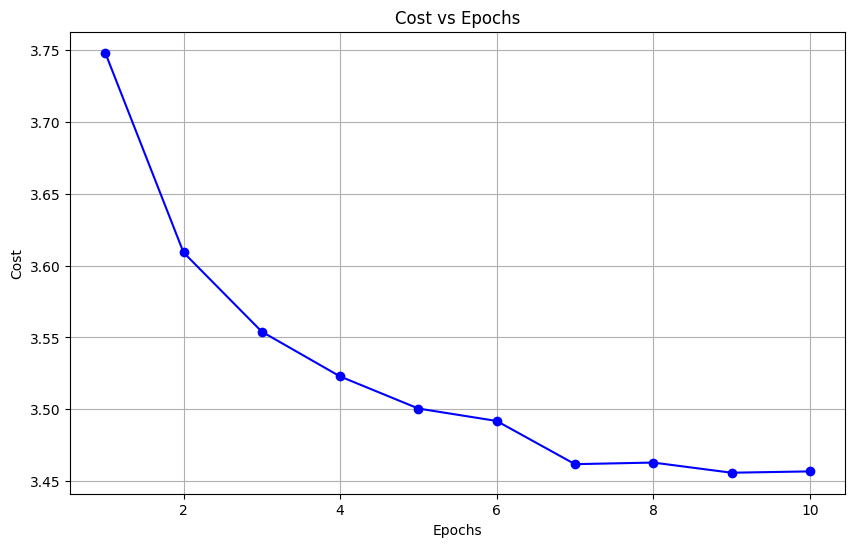

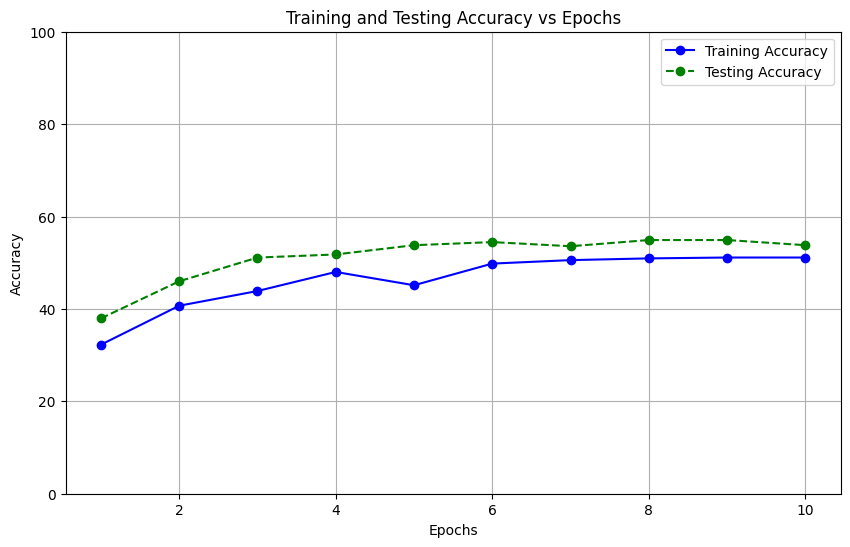

In [14]:
costs,train_accs,test_accs = model_history
plot_costs(costs)
plot_accuracies(train_accs,test_accs)

In [15]:
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(),lr=1e-3,weight_decay=1e-4)
EPOCHS = 10

In [16]:
model_history = train(model,train_loader,loss_fn,optimiser,device,EPOCHS,test_loader)

Epoch 1
|||||		Cost : 3.4525448417663576	train accuracy : 52.56%	test accuracy : 55.13%
--------------------------
Epoch 2
|||||		Cost : 3.428997755050659	train accuracy : 53.44%	test accuracy : 55.36%
--------------------------
Epoch 3
|||||		Cost : 3.427496929168701	train accuracy : 52.50%	test accuracy : 55.13%
--------------------------
Epoch 4
|||||		Cost : 3.4311725807189943	train accuracy : 54.19%	test accuracy : 55.36%
--------------------------
Epoch 5
|||||		Cost : 3.4315288066864014	train accuracy : 53.44%	test accuracy : 55.36%
--------------------------
Epoch 6
|||||		Cost : 3.428781328201294	train accuracy : 53.56%	test accuracy : 55.36%
--------------------------
Epoch 7
|||||		Cost : 3.4308559894561768	train accuracy : 54.19%	test accuracy : 56.03%
--------------------------
Epoch 8
|||||		Cost : 3.4293852424621583	train accuracy : 54.56%	test accuracy : 55.80%
--------------------------
Epoch 9
|||||		Cost : 3.417086572647095	train accuracy : 54.25%	test accuracy : 56.

In [17]:
current_time = str(datetime.datetime.now())[:-7].replace(' ','_').replace(':','-')
MODEL_PATH = f"{STORE_PATH}/esc-model1_{current_time}.pth"
print(MODEL_PATH)
torch.save(model.state_dict(),MODEL_PATH)

/kaggle/working/esc-model1_2024-08-20_06-45-13.pth


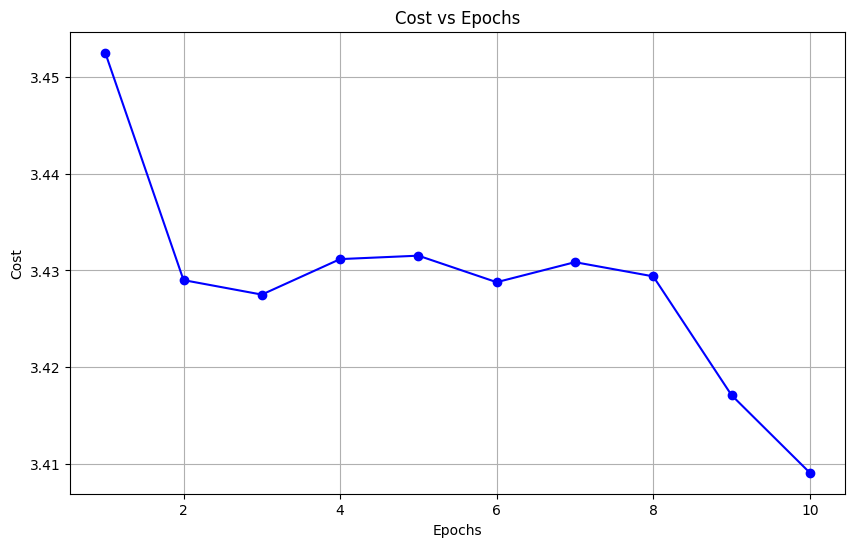

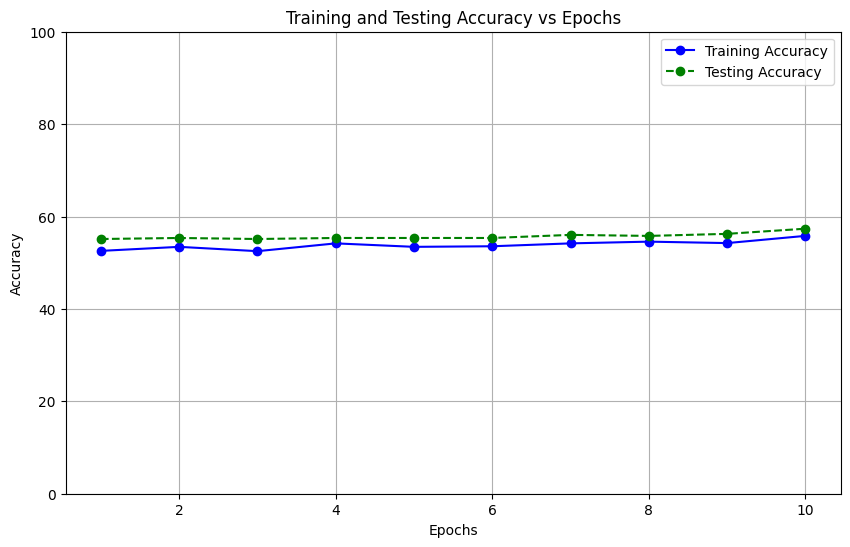

In [18]:
costs,train_accs,test_accs = model_history
plot_costs(costs)
plot_accuracies(train_accs,test_accs)